In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [13]:
def System(r,t,tau1=0.5,tau2=0.3):
    
    Na,Nb,Nc= r
    
    dNadt = -tau1*Na
    dNbdt = Na*tau1 - Nb*tau2
    dNcdt= tau2*Nb

    
    return np.array([dNadt,dNbdt,dNcdt])

In [14]:

t = np.linspace(0,10,50)
r0 = np.array([500, 0, 0])
sistema= System(r0,t)

In [15]:
sol = odeint(System, r0, t, args=(0.5,0.3))

In [16]:
def Increment(f,r,t,h):

    #los state definen el cambio en las variables vectorizadas
    #en los k1 se evelua el cambio 
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [17]:
def Adaptativo(f,r0,t,e=1e-4):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r 
    Steps = np.array([h])

    while t < tf:
        
        Delta1 = Increment(f,r,t,h)
        Delta2 = Increment(f,Delta1,t+h,h)
        Delta3 = Increment(f,r,t,2*h)
 
        error=  np.linalg.norm(Delta2- Delta3)
        
        if error < e:
                t += 2*h
                r = Delta3       
                Steps = np.append(Steps,h )
                Time = np.append(Time,t)
                Vector = np.vstack((Vector,r))
                
        else:

                q = 0.85*(e/error)**(1/4)
                h = h*q

 

              
        
    return Time,Vector,Steps

In [18]:
t1,x1,h1= Adaptativo(System,r0,t)

Na= x1[:,0]
Nb=x1[:,1]
Nc= x1[:,2]



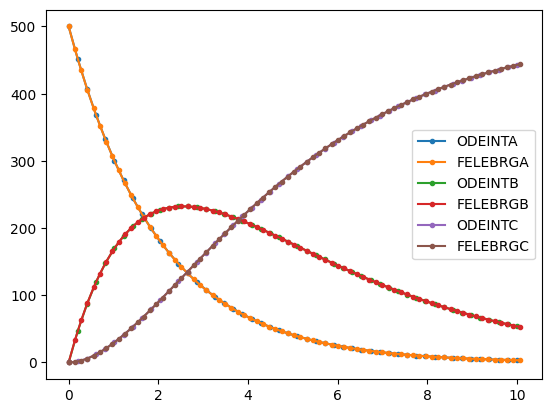

In [19]:
plt.plot(t,sol[:,0],marker='.',label="ODEINTA")
plt.plot(t1,x1[:,0],marker='.',label="FELEBRGA")

plt.plot(t,sol[:,1],marker='.',label="ODEINTB")
plt.plot(t1,x1[:,1],marker='.',label="FELEBRGB")

plt.plot(t,sol[:,2],marker='.',label="ODEINTC")
plt.plot(t1,x1[:,2],marker='.',label="FELEBRGC")
plt.legend()

In [20]:
Bmax=np.max(Nb)
Bmax


232.35141936011607

In [21]:
tmax=np.where(Nb==Bmax)[0][0]


In [22]:
Cenbmax=Nc[tmax]
Cenbmax

125.43914594827014